In [7]:
#importing libraries as well as my dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/ghosh/Documents/Life/UChicago/Professional Development 23-24/Syracuse Basketball Case Competition/data.csv")
shooting_stats = pd.read_csv('C:/Users/ghosh/Documents/Life/UChicago/Professional Development 23-24/Syracuse Basketball Case Competition/Player Shooting Stats.csv')
shooting_stats.head()
#the above is my own personal filepath

,Player,Pos,Tm,2P,0-3,10-Mar,16-Oct,16-3P,3P,3P%,G,FG%,Dist.
0,Precious Achiuwa,C,TOR,0.564,0.734,0.406,0.286,0.200,0.269,0.250,55,0.485,9.7
1,Steven Adams,C,MEM,0.599,0.645,0.500,0.400,NaN,0.000,0.000,42,0.597,2.6
2,Bam Adebayo,C,MIA,0.545,0.714,0.479,0.497,0.288,0.083,NaN,75,0.540,7.3
3,Ochai Agbaji,SG,UTA,0.532,0.621,0.494,0.400,0.444,0.355,0.457,59,0.427,16.9
4,Santi Aldama,PF,MEM,0.591,0.707,0.471,0.250,0.444,0.353,0.365,77,0.470,14.6


In [9]:
#want to make a new dataset that finds the shots that are shot, matches them with the player shooting, and finds the expected split

#first, I am going to make some edits to the dataset that get rid of players on multiple teams
#those players have a combined row with takes all their data and combines it into one, and I am taking the combined row out
drop_con = (shooting_stats['Tm'] == 'TOT')
shooting_stats = shooting_stats[~drop_con]


data['Shooting Percent at Distance'] = pd.NA
data['Expected Points per Shot'] = pd.NA

#getting column indexes
distance_percent_value = data.columns.get_loc('Shooting Percent at Distance')
player_name_value = data.columns.get_loc('player_name')
distance_column_value = data.columns.get_loc('result_dist')
tm_column = data.columns.get_loc('off_team')
pts_value = data.columns.get_loc('result_pts')

#getting indexes for the shooting splits dataframe
short, short_mid, mid_mid, long_mid, three_point, corner_three = np.arange(9,15)

#creating a function to sort the shot distance into our given shot distance categories
def shot_convert(distance, points):
    if 0 <= distance < 3:
        val = 4
    elif 3 <= distance < 10:
        val = 5
    elif 10 <= distance < 16:
        val = 6
    elif (22 <= distance < 23.75) and (points == 3):
        val = 9
    elif 16 <= distance < 23.75:
        val = 7
    else:
        val = 8
    return val

#now making a function that uses the player's name, team, and shot distance to find their FG% from that area
def percentage_finder(val1, val2, val3, val4):
    selected_row = shooting_stats.loc[(shooting_stats['Player'] == val1) & (shooting_stats['Tm'] == val2)]
    # Check if selected_row is empty
    if not selected_row.empty:
        range_column = shot_convert(val3, val4) 
        # Check if range_column is within the valid range
        if 0 <= range_column < len(selected_row.columns):
            percentage = selected_row.iloc[0, range_column]
            return percentage
        else:
            print(f"Invalid range_column: {range_column}")
            return None
    else:
        print(f"No matching rows for {val1} and {val2}")
        return None  # or return a default value or handle accordingly

#for the made shots
for i in range(len(data)):
    if (data.iloc[i, pts_value] in [2, 3]) and (data.iloc[i, 14] == 'OFF'):
        name = data.iloc[i, player_name_value]
        team = data.iloc[i, tm_column]
        distance = data.iloc[i, distance_column_value]
        points = data.iloc[i, pts_value]
        data.iloc[i,-2] = percentage_finder(name, team, distance, points)
        data.iloc[i,-1] = (data.iloc[i,-2] * data.iloc[i, pts_value])
    else:
        continue
#now we have a dataframe with a shooting percentage for each specific player at distance and the expected value of their shot

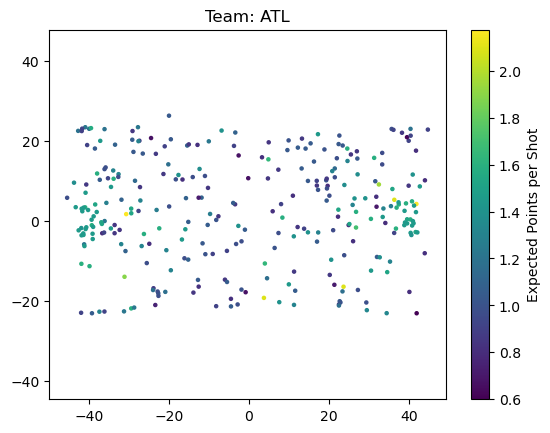

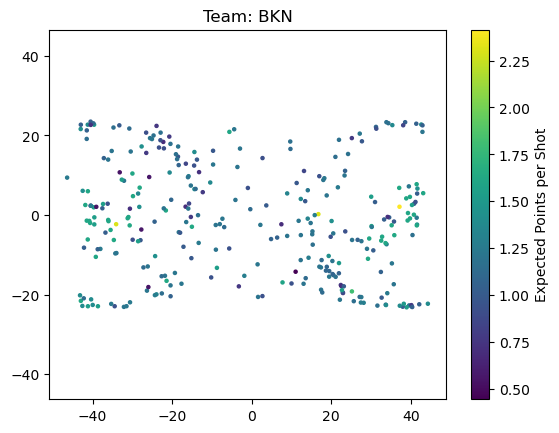

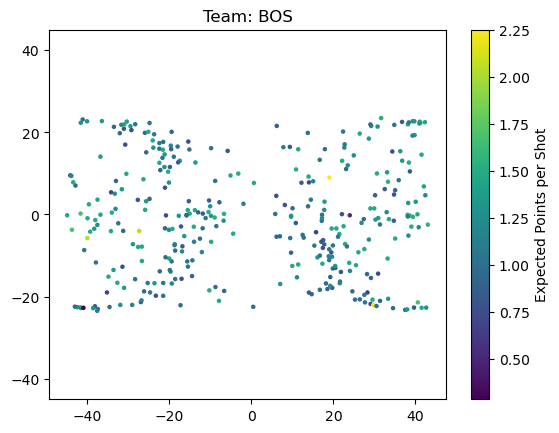

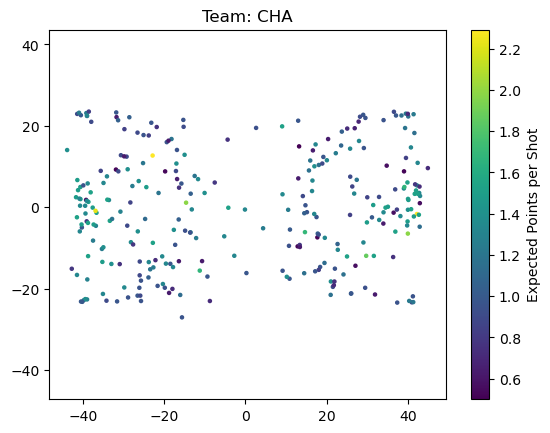

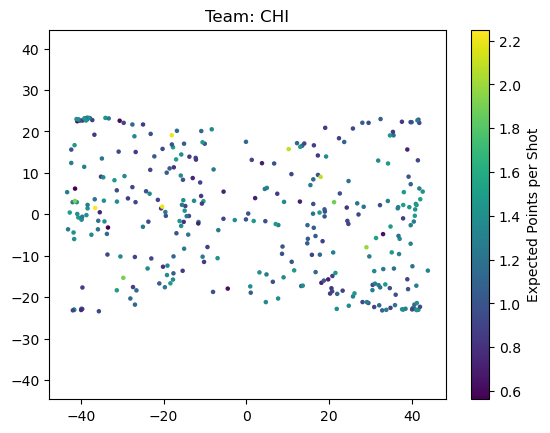

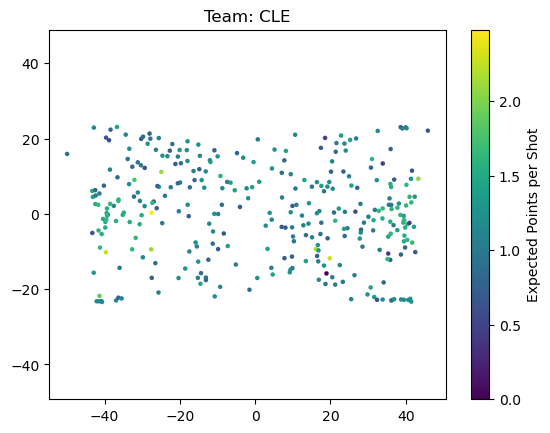

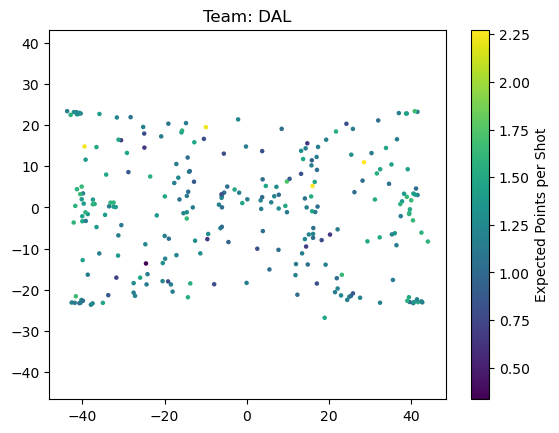

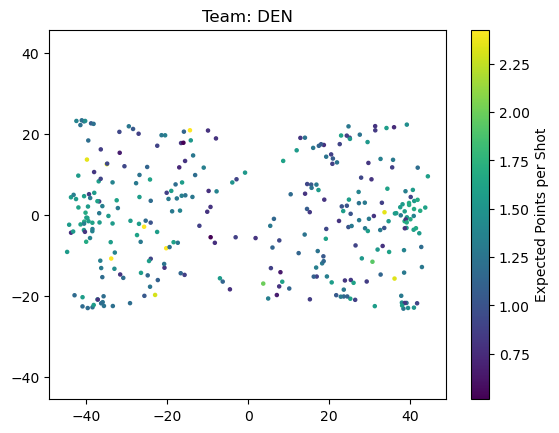

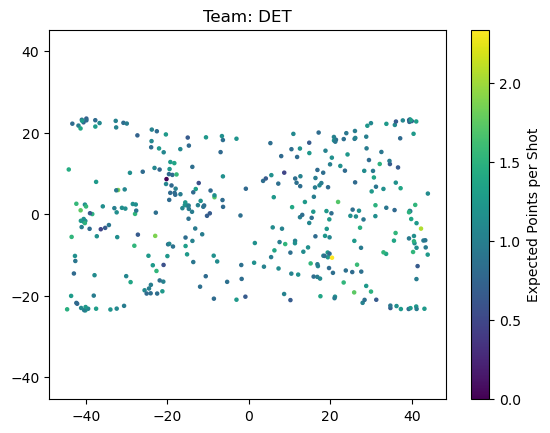

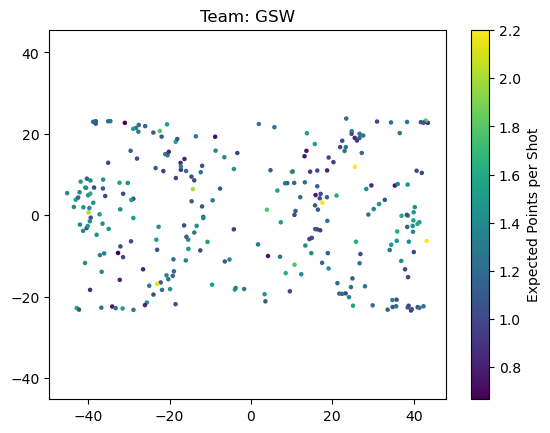

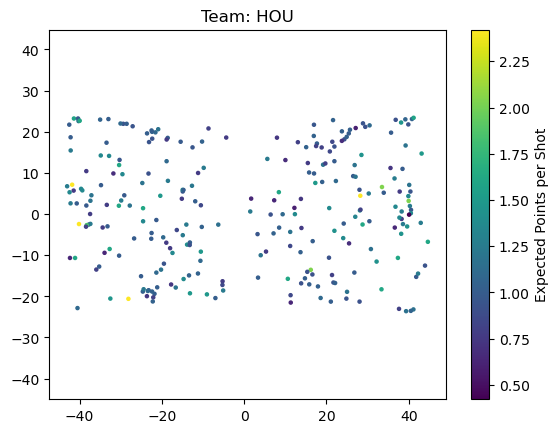

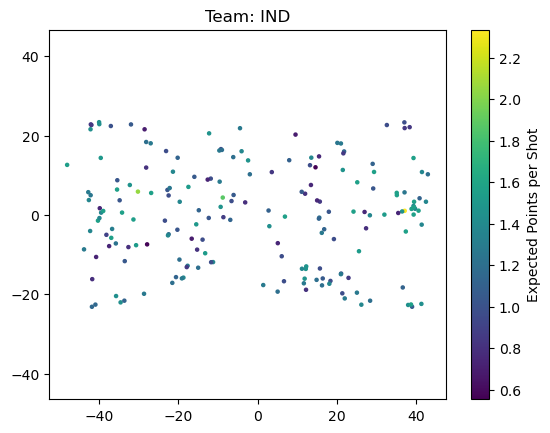

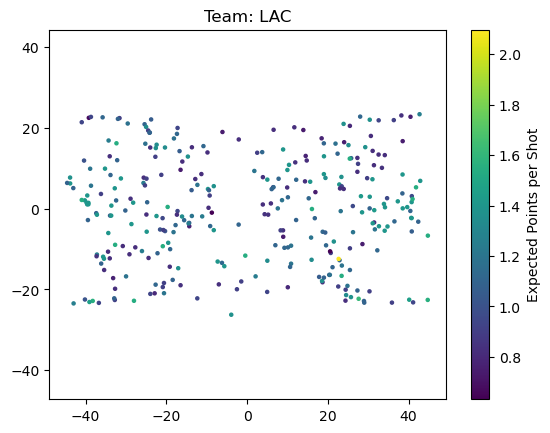

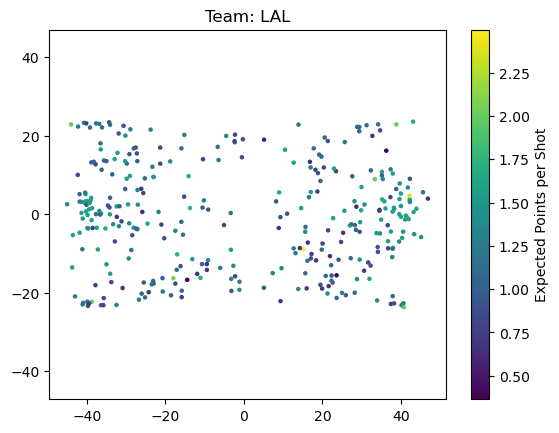

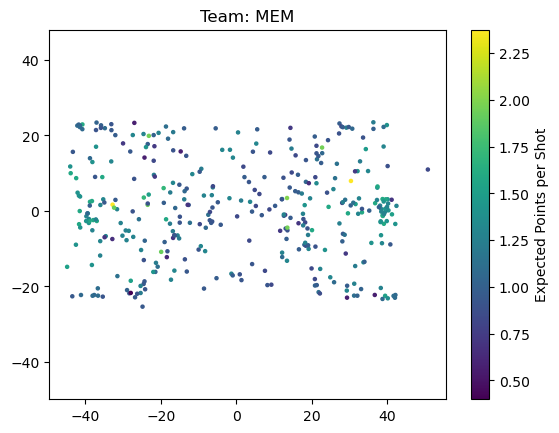

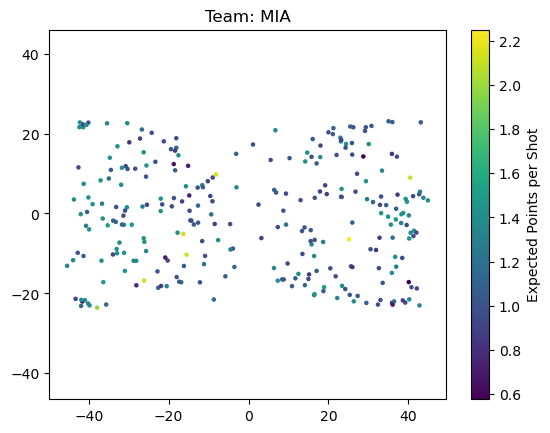

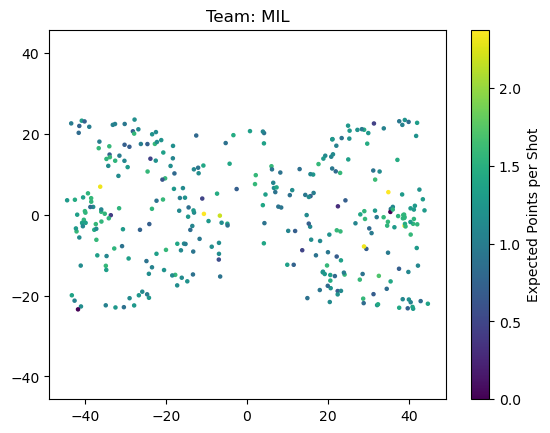

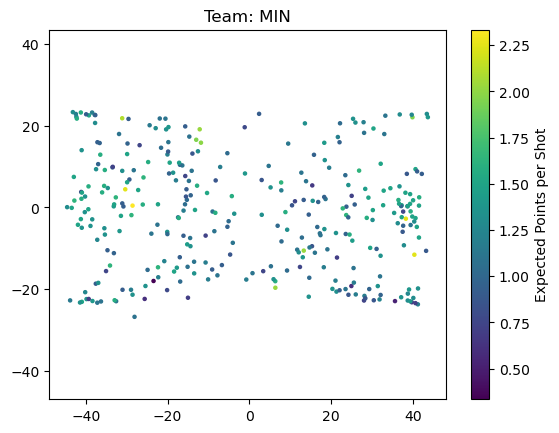

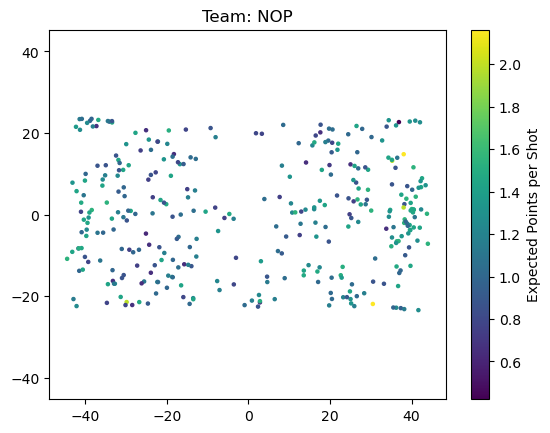

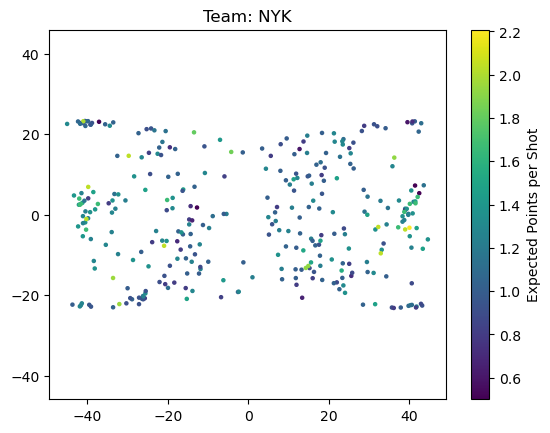

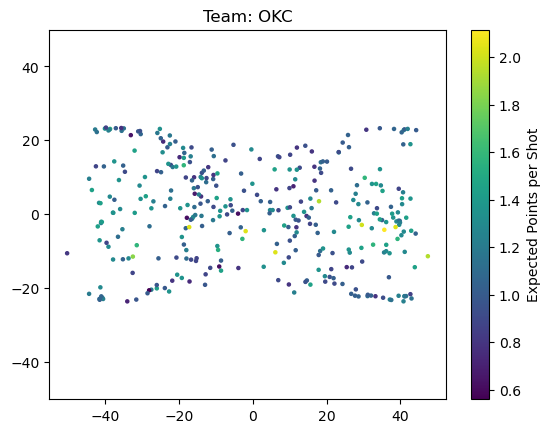

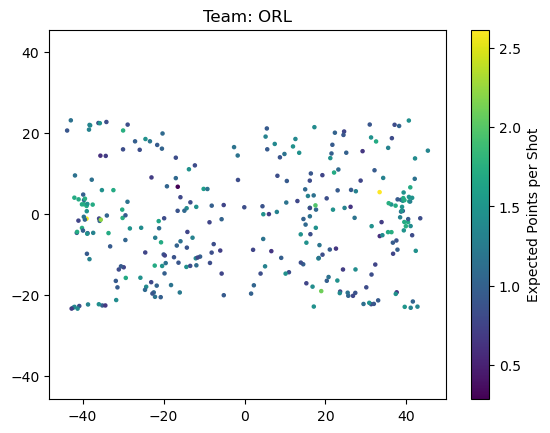

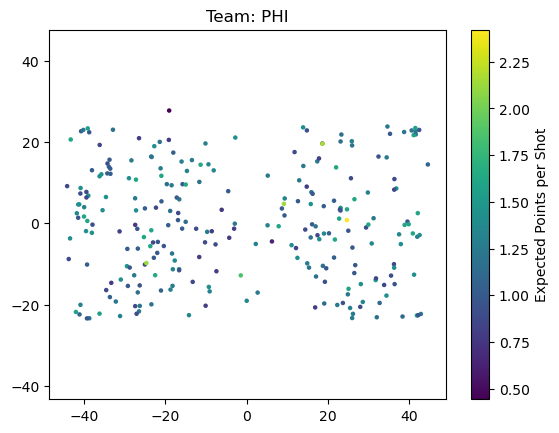

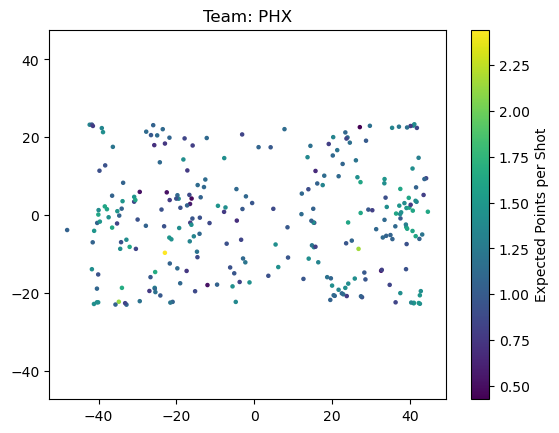

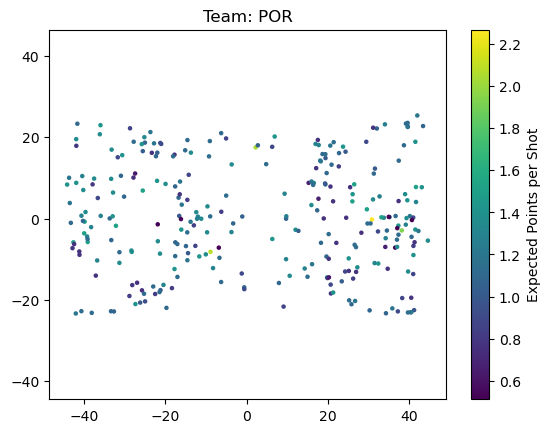

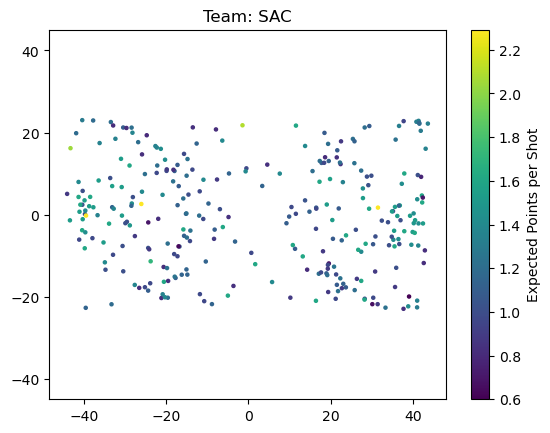

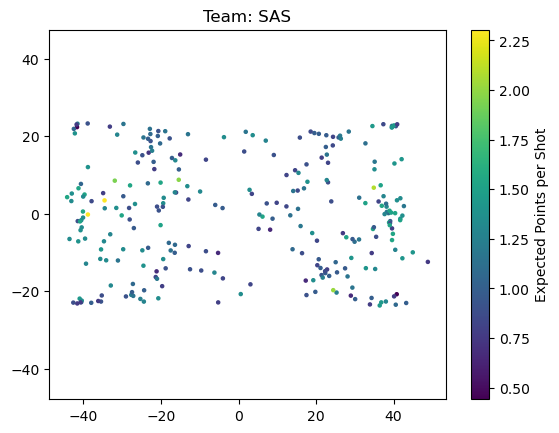

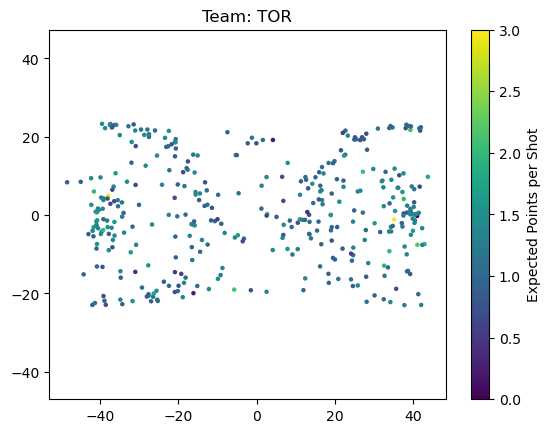

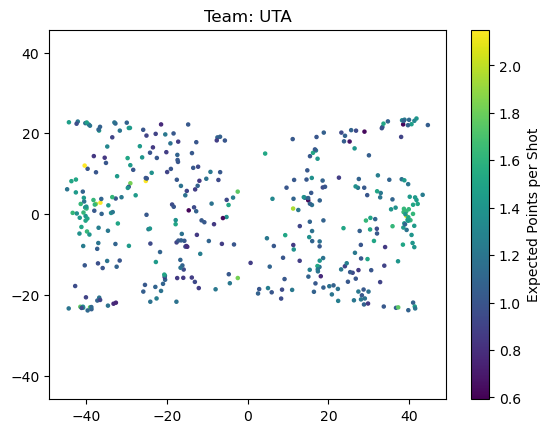

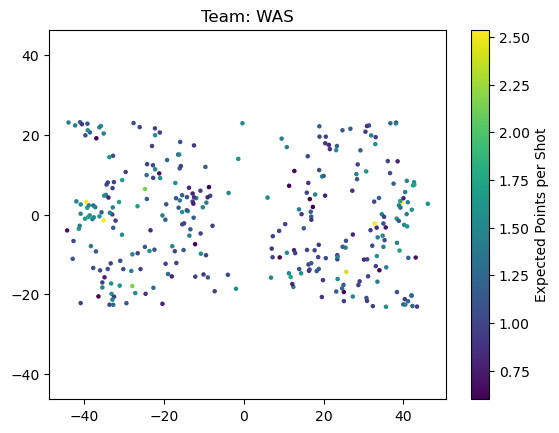

""


In [21]:
#making graphs for each team with locations of successful shots

# starting with making a dataframe with only made shots
column_check = ['Shooting Percent at Distance', 'Expected Points per Shot']
made_shots = data.dropna(subset = column_check)

#grouping by offensive team
team_shots = made_shots.groupby("off_team")

#importing matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#making graphs on where these offensive shots come from
def graphs(group):
    plt.axis('equal')
    plt.scatter(group['player_x'], group['player_y'], c = group['Expected Points per Shot'], cmap = 'viridis', marker = 'o', s = 5)
    plt.colorbar(label = 'Expected Points per Shot')
    plt.title(f'Team: {group.name}')
    plt.show()

#apply the custom function to each group
team_shots.apply(graphs)

In [ ]:
made_shots